## 目录

In [8]:
%%html
<img src='超市零售数据分析.jpg'>

### 1、明确需求和目的

对一家全球超市四年（2011-2014）的销售数据进行 人、货、场 分析，并给出提升销量的针对性建议。
+ 场：整体运营情况分析，包括销售额、销量、利润、客单价、市场布局等具体情况分析；
+ 货：商品结构、优势/爆款商品、劣势/待优化商品等情况分析；
+ 人：客户数量、新老客户、REM模型、复购率、回购率等用户行为分析。

### 2、数据收集

数据来源为kaggle平台，这是一份全球大型超市四年的零售数据集，数据详尽。
数据集为superstore_dataset2011-2015.csv，共有51290条数据，共24个特征。

### 3、数据预处理

#### 3.1、数据整合

##### 3.1.1 加载相关库和数据集

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.rcParams['font.sans-serif'] = ['SimHei']
%matplotlib inline

df = pd.read_csv('superstore_dataset2011-2015.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


##### 3.1.2 数据概览

In [10]:
# 先看一下数据集大小
df.shape

(51290, 24)

In [11]:
# 再看一下数据的整体情况
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


#### 3.2、数据清洗

##### 3.2.1 列名重命名

In [12]:
# 观察数据集可以发现，列名存在着不符合Python标准的命名规范，
# 因此对列名进行一下重命名，采用下划线命名法
df.rename(columns = lambda x: x.replace(' ', '_').replace('-','_'), inplace=True)

In [13]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Postal_Code', 'Market', 'Region', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')

##### 3.2.2 数据类型处理

In [14]:
# 先看一下每一列的数据类型
df.dtypes

Row_ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer_Name      object
Segment            object
City               object
State              object
Country            object
Postal_Code       float64
Market             object
Region             object
Product_ID         object
Category           object
Sub_Category       object
Product_Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
dtype: object

可以看到：大部分列是object类型，销量、销售额、利润等列是数值型，这些列都不需要进行数据类型处理。下单日期应该为datetime类型，我们需要对其进行处理。

In [15]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Date'].sample(5)

50514   2014-03-31
33629   2013-12-20
6531    2012-09-07
34810   2013-09-21
29388   2014-08-18
Name: Order_Date, dtype: datetime64[ns]

In [16]:
# 为了便于分析每年和每月的销售情况，新增加 年份列 和 月分列
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].values.astype('datetime64[M]')

In [17]:
df.head(10)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,year,month
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium,2011,2011-01-01
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium,2011,2011-01-01
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High,2011,2011-01-01
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High,2011,2011-01-01
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium,2011,2011-01-01
5,22254,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium,2011,2011-01-01
6,21613,IN-2011-30733,2011-01-02,3/2/2011,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,...,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical,2011,2011-01-01
7,34662,CA-2011-115161,2011-01-02,3/2/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,...,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High,2011,2011-01-01
8,44508,AO-2011-1390,2011-01-02,4/2/2011,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,...,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical,2011,2011-01-01
9,23688,ID-2011-56493,2011-01-02,3/2/2011,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,...,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical,2011,2011-01-01


##### 3.2.3 缺失值处理

In [18]:
# 查看缺失值情况
df.isnull().sum(axis=0)

Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
City                  0
State                 0
Country               0
Postal_Code       41296
Market                0
Region                0
Product_ID            0
Category              0
Sub_Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
year                  0
month                 0
dtype: int64

通过观察发现，有一列缺失值比较多，此列表示 邮编信息，由于该列对我们的分析没有太多作用，可直接删除

In [19]:
df.drop(['Postal_Code'], axis=1, inplace=True)

##### 3.2.4 异常值处理

In [20]:
# 查看是否有异常值
df.describe()

,Row_ID,Sales,Quantity,Discount,Profit,Shipping_Cost,year
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


没有发现明显的异常值，不需要进行处理

##### 3.2.5 重复值处理

In [21]:
# 查看是否存在重复值
df.duplicated().sum()

0

### 4、数据分析

#### 4.1、整体销售情况

In [22]:
# 首先构造整体销售情况子数据集
# 整体销售情况子数据集，包括下单日期、销售额、销量、利润、年份、月份信息
sales_date = df[['Order_Date', 'Sales', 'Quantity', 'Profit', 'year', 'month']]
sales_date.sample(5)

,Order_Date,Sales,Quantity,Profit,year,month
39448,2011-08-24,60.8580,14,-75.2220,2011,2011-08-01
7030,2012-10-12,178.0200,6,49.6800,2012,2012-10-01
15670,2014-05-06,25.8000,4,9.9600,2014,2014-05-01
5040,2012-05-06,105.4011,7,-55.8789,2012,2012-05-01
46743,2012-09-28,69.0000,2,19.3200,2012,2012-09-01


In [23]:
# 按照年份、月份对销售子数据集进行分组求和
sales_year = sales_date.groupby(['year', 'month']).sum()
display(sales_year)

Sales  Quantity       Profit
year month                                          
2011 2011-01-01  138241.30042      2178  13457.23302
     2011-02-01  134969.94086      1794  17588.83726
     2011-03-01  171455.59372      2183  16169.36062
     2011-04-01  128833.47034      2181  13405.46924
     2011-05-01  148146.72092      2057  14777.45792
     2011-06-01  189338.43966      2715  25932.87796
     2011-07-01  162034.69756      2266  10631.84406
     2011-08-01  219223.49524      2909  19650.67124
     2011-09-01  255237.89698      3357  32313.25458
     2011-10-01  204675.07846      2615  30745.54166
     2011-11-01  214934.29386      3165  21261.40536
     2011-12-01  292359.96752      4023  33006.85862
2012 2012-01-01  162800.89338      2150  19627.42058
     2012-02-01  152661.15144      2156  17828.18244
     2012-03-01  201608.72784      2880  22752.87684
     2012-04-01  187469.96192      2506  20804.00532
     2012-05-01  218960.16042      3239  22865.39572
     2012-06-01  249289.77172      3508  34358.03962
     2012-07-01  174394.02808      2551  21725.18808
     2012-08-01  271669.66086      3451  36511.44996
     2012-09-01  256567.85308      3752  25039.93498
     2012-10-01  239321.09904      3399  27773.87454
     2012-11-01  270723.05356      4497  26160.60686
     2012-12-01  291972.33306      4022  31968.30416
2013 2013-01-01  206459.19582      2766  26052.40252
     2013-02-01  191062.77216      2535  31553.99756
     2013-03-01  230547.79468      3130  34873.71938
     2013-04-01  233181.34844      3161  26008.05144
     2013-05-01  304509.96336      4115  39053.30946
     2013-06-01  341162.34370      4948  43298.85000
     2013-07-01  223642.65664      3594  27019.91294
     2013-08-01  323876.60716      4564  32977.75576
     2013-09-01  326897.27044      5067  18850.09084
     2013-10-01  270121.87570      3977  27871.97470
     2013-11-01  383039.21248      5274  51720.88568
     2013-12-01  371245.40880      5005  47654.27990
2014 2014-01-01  268265.52240      3656  31447.74660
     2014-02-01  244159.30486      3450  29454.01876
     2014-03-01  347720.96868      4820  50097.04458
     2014-04-01  302132.54000      4397  35709.53320
     2014-05-01  304798.83604      4415  34335.60404
     2014-06-01  372577.23298      5528  40869.02108
     2014-07-01  278672.17326      3867  26450.70856
     2014-08-01  432731.04194      5506  46443.47934
     2014-09-01  405436.70584      5741  52533.83284
     2014-10-01  406659.41500      5915  52342.49740
     2014-11-01  508954.73156      7020  55561.72406
     2014-12-01  427757.39800      6307  48920.76000

In [24]:
# 对以上数据进行拆分，每年为一个表
# slice(None) 是python中的切片操作，这里用来选择全部数据
year_2011 = sales_year.loc[(2011, slice(None)), :].reset_index()
year_2012 = sales_year.loc[(2012, slice(None)), :].reset_index()
year_2013 = sales_year.loc[(2013, slice(None)), :].reset_index()
year_2014 = sales_year.loc[(2014, slice(None)), :].reset_index()
display(year_2014)  # 查看一下2014年的数据

,year,month,Sales,Quantity,Profit
0,2014,2014-01-01,268265.52240,3656,31447.74660
1,2014,2014-02-01,244159.30486,3450,29454.01876
2,2014,2014-03-01,347720.96868,4820,50097.04458
3,2014,2014-04-01,302132.54000,4397,35709.53320
4,2014,2014-05-01,304798.83604,4415,34335.60404
5,2014,2014-06-01,372577.23298,5528,40869.02108
6,2014,2014-07-01,278672.17326,3867,26450.70856
7,2014,2014-08-01,432731.04194,5506,46443.47934
8,2014,2014-09-01,405436.70584,5741,52533.83284
9,2014,2014-10-01,406659.41500,5915,52342.49740


##### 4.1.1 销售额分析

In [25]:
# 构建销售表
sales = pd.concat([year_2011['Sales'], year_2012['Sales'],
                  year_2013['Sales'], year_2014['Sales']], axis=1)

# 对行和列重新命名
sales.columns = ['Sales-2011', 'Sales-2012', 'Sales-2013', 'Sales-2014']
sales.index=['Jau', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
            'Sep', 'Oct', 'Nov', 'Dec']

# 颜色越深，销售额越高
sales.style.background_gradient()

,Sales-2011,Sales-2012,Sales-2013,Sales-2014
Jau,138241.300420,162800.893380,206459.195820,268265.522400
Feb,134969.940860,152661.151440,191062.772160,244159.304860
Mar,171455.593720,201608.727840,230547.794680,347720.968680
Apr,128833.470340,187469.961920,233181.348440,302132.540000
May,148146.720920,218960.160420,304509.963360,304798.836040
Jun,189338.439660,249289.771720,341162.343700,372577.232980
Jul,162034.697560,174394.028080,223642.656640,278672.173260
Aug,219223.495240,271669.660860,323876.607160,432731.041940
Sep,255237.896980,256567.853080,326897.270440,405436.705840
Oct,204675.078460,239321.099040,270121.875700,406659.415000


从上图可以看出，基本上每年都是下半年的销售额要比上半年的高，而且随着年份的增大，销售额也有所增加，说明销售业绩增长较快，发展还是比较好的。

肉眼可见的是每一年的销售额都比前一年要好，来实际计算一下具体的增长率和每年的销售总额。

,sales_sum,rise_rate
Sales-2011,2.259451e+06,0.000000
Sales-2012,2.677439e+06,0.184995
Sales-2013,3.405746e+06,0.184995
Sales-2014,4.299866e+06,0.262533


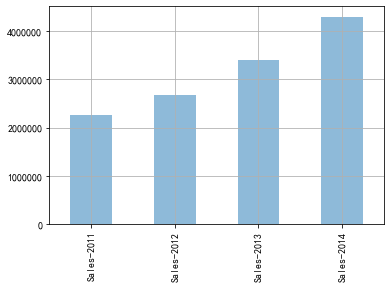

In [27]:
# 计算年度销售额并图表表示
sales_sum = sales.sum()
sales_sum.plot(kind='bar', alpha=0.5)
plt.grid()

# 计算每年增长率
rise_12 = sales_sum[1]/sales_sum[0]-1
rise_13 = sales_sum[2]/sales_sum[1]-1
rise_14 = sales_sum[3]/sales_sum[2]-1
rise_rate = [0,rise_12,rise_12,rise_14]

# 显示增长率
sales_sum=pd.DataFrame({'sales_sum':sales_sum})
sales_sum['rise_rate'] = rise_rate
sales_sum

从上面可以看出，后两年的销售额增长率达到26%，2014年销售额将近是2011的两倍，发展势头良好，经营在逐步稳定。结合年度销售额及增长率，再结合公司整体战略规划们可以预测或制定下一年度总销售额业绩指标。

了解了超市整体销售额后，在对每年每月的销售额进行分析，了解不同月份的销售情况，找出是否有淡旺季之分，找出重点销售月份，以便制定经营策略与业绩月度及季度指标拆分。

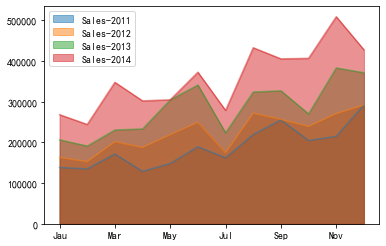

In [28]:
# 看一下销售额的面积堆叠图
sales.plot.area(stacked=False)

从上图可以大致看出，该超市的销售季节性明显，总体上半年是淡季，下半年是旺季。上半年中6月份销售额比较高，下半年中7月份的销售额偏低。
+ 对于旺季的月份，运营推广等策略要继续维持，还可以加大投入，提高整体销售额。
+ 对于淡季的月份，可以结合产品特点进行新产品拓展，举办一些促销活动等吸引客户。

##### 4.1.2 销量分析

In [29]:
# 构建销量表
quantity = pd.concat([year_2011['Quantity'], year_2012['Quantity'],
                     year_2013['Quantity'], year_2014['Quantity']],axis=1)

# 队列名和行名进行重命名
quantity.columns = ['Quantity-2011', 'Quantity-2012', 'Quantity-2013', 'Quantity-2014']
quantity.index = ['Jau', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
            'Sep', 'Oct', 'Nov', 'Dec']

# 颜色越深，销量越高
quantity.style.background_gradient()

,Quantity-2011,Quantity-2012,Quantity-2013,Quantity-2014
Jau,2178,2150,2766,3656
Feb,1794,2156,2535,3450
Mar,2183,2880,3130,4820
Apr,2181,2506,3161,4397
May,2057,3239,4115,4415
Jun,2715,3508,4948,5528
Jul,2266,2551,3594,3867
Aug,2909,3451,4564,5506
Sep,3357,3752,5067,5741
Oct,2615,3399,3977,5915


,quantity_sum,rise_rate
Quantity-2011,31443,0.000000
Quantity-2012,38111,0.212066
Quantity-2013,48136,0.263047
Quantity-2014,60622,0.259390


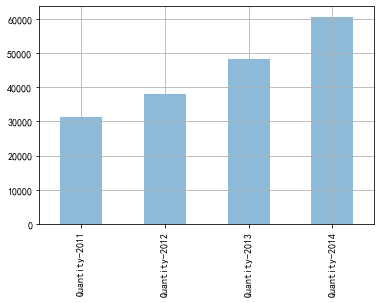

In [30]:
# 看一下销量增长率和每年的销量总和
# 计算年度销量并图表表示
quantity_sum = quantity.sum()
quantity_sum.plot(kind='bar', alpha=0.5)
plt.grid()

# 计算每年的增长率
rise_12=quantity_sum[1]/quantity_sum[0]-1
rise_13=quantity_sum[2]/quantity_sum[1]-1
rise_14=quantity_sum[3]/quantity_sum[2]-1
rise_rate = [0, rise_12, rise_13, rise_14]

# 显示增长率
quantity_sum = pd.DataFrame({'quantity_sum':quantity_sum})
quantity_sum['rise_rate']=rise_rate
quantity_sum

从上面可以看出，2011年-2014年销量变化趋势与销售额是一样的，下半年销量整体高于上半年，同时销量同比上一年均在提高。

##### 4.1.3 利润分析

In [31]:
# 构建利润表
profit = pd.concat([year_2011['Profit'], year_2012['Profit'], 
                   year_2013['Profit'], year_2014['Profit']],axis=1)
profit.columns = ['Profit-2011', 'Profit-2012', 'Profit-2013', 'Profit-2014']
profit.index = ['Jau', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
            'Sep', 'Oct', 'Nov', 'Dec']

profit.style.background_gradient()

,Profit-2011,Profit-2012,Profit-2013,Profit-2014
Jau,13457.233020,19627.420580,26052.402520,31447.746600
Feb,17588.837260,17828.182440,31553.997560,29454.018760
Mar,16169.360620,22752.876840,34873.719380,50097.044580
Apr,13405.469240,20804.005320,26008.051440,35709.533200
May,14777.457920,22865.395720,39053.309460,34335.604040
Jun,25932.877960,34358.039620,43298.850000,40869.021080
Jul,10631.844060,21725.188080,27019.912940,26450.708560
Aug,19650.671240,36511.449960,32977.755760,46443.479340
Sep,32313.254580,25039.934980,18850.090840,52533.832840
Oct,30745.541660,27773.874540,27871.974700,52342.497400


,profit_sum,year,sales_sum,profit_rate
0,248940.81154,2011,2.259451e+06,0.110178
1,307415.27910,2012,2.677439e+06,0.114817
2,406935.23018,2013,3.405746e+06,0.119485
3,504165.97046,2014,4.299866e+06,0.117252


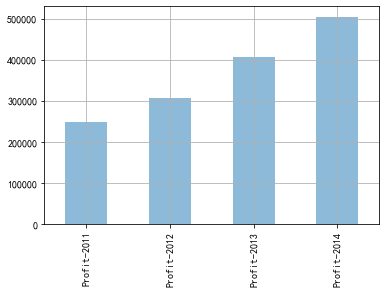

In [35]:
# 计算每年的总利润和利润率
profit_sum = profit.sum()
profit_sum.plot(kind='bar', alpha=0.5)
plt.grid()

profit_sum = pd.DataFrame({'profit_sum':profit_sum})
profit_sum['year'] = [2011, 2012, 2013, 2014]

sales_sum = pd.DataFrame({'sales_sum':sales.sum()})
sales_sum['year'] = [2011, 2012, 2013, 2014]

profit_sum = pd.merge(profit_sum, sales_sum)
profit_sum['profit_rate'] = profit_sum['profit_sum'] / profit_sum['sales_sum']
profit_sum

从上面的结果可以看出，每年的利润和销售额一样，是在逐年增加的，说明企业经营还是比较妥善的，但是利润率总体平稳，稳定在11%-12%之间，总体利润率也还是不错的。

##### 4.1.4 客单价分析

客单价：是指商场（超市）每一个客户平均购买商品的金额，客单价也就是平均交易金额。从某种程度上反映了企业的消费群体的许多特点以及企业的销售类目的的盈利状态是否健康。
总消费次数：同一天内，同一个人发生的所有消费算作一次消费。

客单价 = 总消费金额 / 总消费次数

In [38]:
# 2011 - 2014年客单价
for i in range(2011, 2015):
    data = df[df['year'] == i]
    price = data[['Order_Date', 'Customer_ID', 'Sales']]
    
    # 计算总消费次数
    price_dr = price.drop_duplicates(
        subset=['Order_Date', 'Customer_ID'])
    
    # 总消费次数：有多少行
    total_num = price_dr.shape[0]
    print('{}年总消费次数='.format(i), total_num)
    
    unit_price = price['Sales'].sum()/total_num
    print('{}年客单价='.format(i), unit_price, '\n')

2011年总消费次数= 4453
2011年客单价= 507.3997070604087 

2012年总消费次数= 5392
2012年客单价= 496.55762136498515 

2013年总消费次数= 6753
2013年客单价= 504.3308824788983 

2014年总消费次数= 8696
2014年客单价= 494.4647965225392 



从上面结果来看，每年的消费次数呈不断上升趋势，但是客单价总体浮动范围不是很大，稳定在500元左右。

##### 4.1.5 市场布局分析
因为这是一家全球超市，在不同地区都会有市场，所以看一下不同地区之间的销售情况。

In [39]:
Market_Year_Sales = df.groupby(['Market', 'year']).agg({'Sales':'sum'}).reset_index().rename(columns={'Sales':'Sales_amounts'})
display(Market_Year_Sales)

,Market,year,Sales_amounts
0,APAC,2011,6.392453e+05
1,APAC,2012,7.627193e+05
2,APAC,2013,9.745809e+05
3,APAC,2014,1.209199e+06
4,Africa,2011,1.271873e+05
5,Africa,2012,1.444807e+05
6,Africa,2013,2.290688e+05
7,Africa,2014,2.830364e+05
8,Canada,2011,8.509110e+03
9,Canada,2012,1.609680e+04


Text(0.5, 1.0, '2011-2014 market sales')

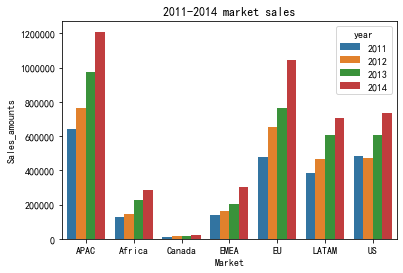

In [49]:
# 使用图表显示各个地区每年的销售情况
# sns.barplot(x='Market', y='Sales_amounts', hue='year', date=Market_Year_Sales)
# plt.title('2011-2014 Market Sales')
sns.barplot(x='Market', y='Sales_amounts', hue='year', data = Market_Year_Sales)
plt.title('2011-2014 market sales')

In [41]:
# 再看一下四年来各个地区销售额占总销售额的百分比
Market_Sales = df.groupby(['Market']).agg({'Sales':'sum'})
Market_Sales['percent'] = Market_Sales['Sales'] / df['Sales'].sum()
Market_Sales.style.background_gradient()

,Sales,percent
Market,,
APAC,3585744.129000,0.283626
Africa,783773.211000,0.061995
Canada,66928.170000,0.005294
EMEA,806161.311000,0.063766
EU,2938089.061500,0.232398
LATAM,2164605.167080,0.171217
US,2297200.860300,0.181705


从以上图表可以看出，每个地区每年销售额总体处于上升趋势，其中APAC(亚太地区)、EU(欧盟)、US(美国)、LATAM(拉丁美洲)的销售额超过了总销售额的85%，总体也与地区的经济发展相匹配。其中加拿大Canada的销售额微乎其微，可以结合公司整体战略布局进行取舍.

#### 4.2、商品情况分析

In [42]:
# 销量前10名的商品
productId_count = df.groupby('Product_ID').count()['Customer_ID'].sort_values(ascending=False)
display(productId_count.head(10))

Product_ID
OFF-AR-10003651    35
OFF-AR-10003829    31
OFF-BI-10002799    30
OFF-BI-10003708    30
FUR-CH-10003354    28
OFF-BI-10002570    27
OFF-BI-10004140    25
OFF-BI-10004195    24
OFF-BI-10001808    24
OFF-BI-10004632    24
Name: Customer_ID, dtype: int64

In [43]:
# 销售额前十的商品
productId_amount = df.groupby('Product_ID').sum()['Sales'].sort_values(ascending=False)
display(productId_amount.head(10))

Product_ID
TEC-CO-10004722    61599.8240
TEC-PH-10004664    30041.5482
OFF-BI-10003527    27453.3840
TEC-MA-10002412    22638.4800
TEC-PH-10004823    22262.1000
FUR-CH-10002024    21870.5760
FUR-CH-10000027    21329.7300
OFF-AP-10004512    21147.0840
FUR-TA-10001889    20730.7557
OFF-BI-10001359    19823.4790
Name: Sales, dtype: float64

从上面可以看出，销量最高的大部分是办公用品，而销售额最高的大部分是电子产品、家具这些单价较高的商品。

In [45]:
# 利润前十的商品
productId_Profit = df.groupby('Product_ID').sum()['Profit'].sort_values(ascending=False)
display(productId_Profit.head(10))

Product_ID
TEC-CO-10004722    25199.9280
OFF-AP-10004512    10345.5840
TEC-PH-10004823     8121.4800
OFF-BI-10003527     7753.0390
TEC-CO-10001449     6983.8836
FUR-CH-10002250     6123.2553
TEC-PH-10004664     5455.9482
OFF-AP-10002330     5452.4640
TEC-PH-10000303     5356.8060
FUR-CH-10002203     5003.1000
Name: Profit, dtype: float64

利润前十的商品有一半是电子产品，可以重点考虑提升这部分产品的销量，来增加整体的利润。

In [46]:
# 具体商品种类的销售情况
# 根据商品种类和子种类，重新重合成一个新的种类
df['Category_Sub_Category'] = df[['Category', 'Sub_Category']].apply(lambda x:str(x[0])+'_'+str(x[1]),axis=1)
# 按照新的种类进行分组，统计销售额和利润
df_Category_Sub_Category=df.groupby("Category_Sub_Category").agg({"Profit":"sum","Sales":"sum"}).reset_index()
# 按照销售额倒序排序
df_Category_Sub_Category.sort_values(by=["Sales"],ascending=False, inplace=True)
# 每个种类商品的销售额累计占比
df_Category_Sub_Category['cum_percent'] = df_Category_Sub_Category['Sales'].cumsum()/df_Category_Sub_Category['Sales'].sum()
df_Category_Sub_Category

,Category_Sub_Category,Profit,Sales,cum_percent
16,Technology_Phones,216717.00580,1.706824e+06,0.135007
14,Technology_Copiers,258567.54818,1.509436e+06,0.254401
1,Furniture_Chairs,140396.26750,1.501682e+06,0.373181
0,Furniture_Bookcases,161924.41950,1.466572e+06,0.489184
11,Office Supplies_Storage,108461.48980,1.127086e+06,0.578335
4,Office Supplies_Appliances,141680.58940,1.011064e+06,0.658308
15,Technology_Machines,58867.87300,7.790601e+05,0.719931
3,Furniture_Tables,-64083.38870,7.570419e+05,0.779811
13,Technology_Accessories,129626.30620,7.492370e+05,0.839075
6,Office Supplies_Binders,72449.84600,4.619115e+05,0.875611


从图表中可以很清楚的看到不同种类商品的销售额贡献对比，有将近一半的商品的总销售占比达到84%，应该是自家优势主营产品，后续经营中应继续保持，可以结合整体战略发展适当加大投入，逐渐形成自己的品牌。
同时，也可以发现，末尾占比16%的产品中大部分是办公用品中的小物件。可以考虑与其他主营产品结合，连带销售来提升销量，或者考虑对这些商品进行优化。
但是值得关注的是，Table（桌子）的利润是负数，表名这个产品目前处于亏损状态，应该是促销让利太多。通过检查原数据，发现Table大部分都在打折，打折的销量高达76%。如果是在清库存，这个效果是不错的，但如果不是，说明这个产品在市场推广上遇到了瓶颈，或者是遇到强竞争对手，需要结合实际业务进行分析，适当改善经营策略。

#### 4.3、用户情况分析

##### 4.3.1 不同类型的客户占比

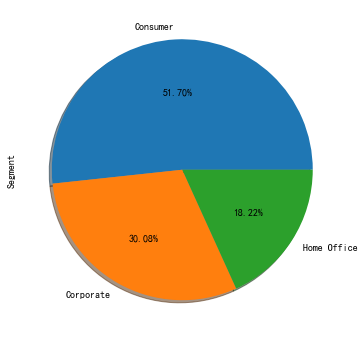

In [47]:
df['Segment'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True,
                                 figsize=(14, 6))

从上图可以看出，这四年来，普通消费者的客户占比最多，达到51.7%

Text(0.5, 1.0, '2011-2014 Segment Customer')

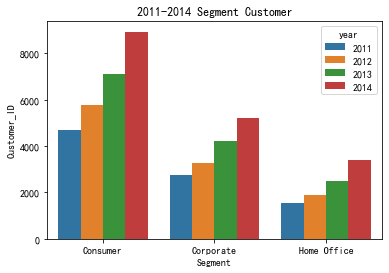

In [48]:
# 每一年不同类型的客户数量情况
Segment_Year = df.groupby(['Segment', 'year']).agg({'Customer_ID':'count'}).reset_index()
sns.barplot(x='Segment', y='Customer_ID', hue='year', data = Segment_Year)
plt.title('2011-2014 Segment Customer')

从上面可以看出，每类客户每年均在保持增长趋势，客户结构还是非常不错的。

Text(0.5, 1.0, '2011-2014 Segment Sales')

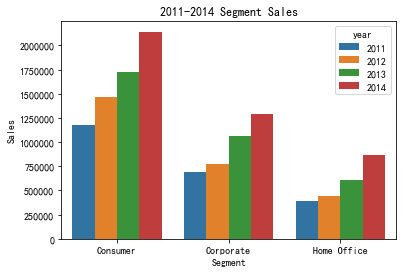

In [50]:
# 不同类型的客户每年贡献的销售额
Segment_sales = df.groupby(["Segment", 'year']).agg({'Sales':'sum'}).reset_index()
sns.barplot(x='Segment', y='Sales', hue='year', data = Segment_sales)
plt.title('2011-2014 Segment Sales')

各个类型的客户每年贡献的销售额都在稳步提升，普通消费者贡献的销售额最多，这个客户占比也有一定关系。

##### 4.3.2 客户下单行为分析

In [51]:
# 首先截取 Customer_ID, Order_Date, Quantity, Sales, month 为新的子集，
# 并对 Order_Date 进行排序，方便后续分析
grouped_Customer = df[['Customer_ID', 'Order_Date', 'Quantity', 
                      'Sales', 'month']].sort_values(['Order_Date']).groupby('Customer_ID')
grouped_Customer.head()

,Customer_ID,Order_Date,Quantity,Sales,month
0,TB-11280,2011-01-01,2,408.300,2011-01-01
1,JH-15985,2011-01-01,3,120.366,2011-01-01
2,AT-735,2011-01-01,4,66.120,2011-01-01
3,EM-14140,2011-01-01,3,44.865,2011-01-01
4,JH-15985,2011-01-01,5,113.670,2011-01-01
...,...,...,...,...,...
43838,AD-180,2014-12-26,4,275.712,2014-12-01
43902,DB-3555,2014-12-26,1,18.180,2014-12-01
43878,AD-180,2014-12-26,2,158.760,2014-12-01
43914,AD-180,2014-12-26,2,4.272,2014-12-01


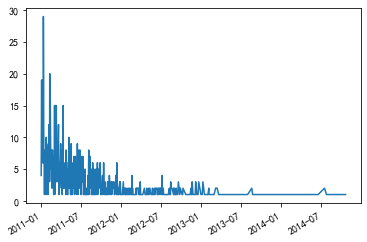

In [52]:
# 用户第一次购买日期分布
grouped_Customer.min().Order_Date.value_counts().plot()

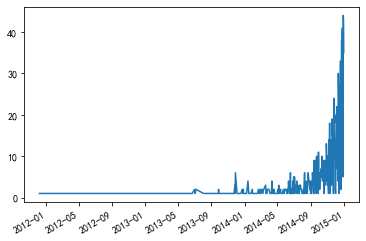

In [53]:
# 用户最后一次购买日期分布
grouped_Customer.max().Order_Date.value_counts().plot()

从上面可以看出， 在13年初以后新用户增长的趋势缓慢，商家可以通过广告等推广策略吸收更多的新用户；而通过观察最近一次购买日期，可以发现用户基本没有流失，也验证了每年销售额的增长趋势。

总体来说新客户数量是在逐年递减的，说明该企业老客户的维系不错，但新客获取率较低。如果能够在新客户获取上能够突破，会给企业带来很大的增长空间。

In [54]:
# 只购买过一次的客户数量
# 统计每个客户第一次和最后一次购买记录
Customer_life = grouped_Customer.Order_Date.agg(['min', 'max'])

# 查看只有一次购买记录的顾客数量，第一次和最后一次是同一条记录，
# 则说明购买只有一次
(Customer_life['min'] == Customer_life['max']).value_counts()

False    1580
True       10
dtype: int64

从结果来看，只购买一次的用户只有10个，大部分用户都会购买多次，说明回头率很高，也验证了上面关于该企业老客户的维系不错的结论。

##### 4.3.3 RFM模型分析

RFM 的含义：
  + R(Recency)：客户最近一次交易时间的间隔，R 值越大，表示客户交易发生的日期越久，反之则表示客户交易发生的日期越近。
  + F(Frequency)：客户在最近一段时间内的交易次数。F 值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。
  + M(Monetary)：客户在最近一段时间内交易的金额。M 值越大，表示客户价值越高，反之则表示客户价值越低。
  
RFM分析就是根据客户活跃程度和交易金额的贡献，进行客户价值细分的一种方法。

In [55]:
# 构建RFM表
rfm = df.pivot_table(index='Customer_ID',
                    values=['Quantity', 'Sales', 'Order_Date'],
                    aggfunc={'Quantity':'sum', 'Sales':'sum', 'Order_Date':'max'})

# 所有用户最大的交易日期为标准，求每笔交易的时间间隔即为R
rfm['R'] = (rfm.Order_Date.max() - rfm.Order_Date) / np.timedelta64(1, 'D')

# 每个客户的总销量即为F，总销售额即为M
rfm.rename(columns={'Quantity':'F', 'Sales':'M'}, inplace=True)
rfm.head()

,Order_Date,F,M,R
Customer_ID,,,,
AA-10315,2014-12-23,145,13747.41300,8.0
AA-10375,2014-12-25,139,5884.19500,6.0
AA-10480,2014-09-05,150,17695.58978,117.0
AA-10645,2014-12-05,267,15343.89070,26.0
AA-315,2014-12-29,20,2243.25600,2.0


In [56]:
# 对客户价值进行标注，将客户分为8个等级
# 基于平均值做比较，超过均值为1，否则为0
rfm[['R','F','M']].apply(lambda x:x-x.mean())

def rfm_func(x):
    level =x.apply(lambda x:'1'if x>0 else '0')
    level =level.R +level.F +level.M
    d = {
        "111":"重要价值客户",
        "011":"重要保持客户",
        "101":"重要挽留客户",
        "001":"重要发展客户",
        "110":"一般价值客户",
        "010":"一般保持客户",
        "100":"一般挽留客户",
        "000":"一般发展客户"
    }
    result = d[level]
    return result

rfm['label']= rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis =1)
rfm.head()

,Order_Date,F,M,R,label
Customer_ID,,,,,
AA-10315,2014-12-23,145,13747.41300,8.0,重要保持客户
AA-10375,2014-12-25,139,5884.19500,6.0,一般保持客户
AA-10480,2014-09-05,150,17695.58978,117.0,重要价值客户
AA-10645,2014-12-05,267,15343.89070,26.0,重要保持客户
AA-315,2014-12-29,20,2243.25600,2.0,一般发展客户


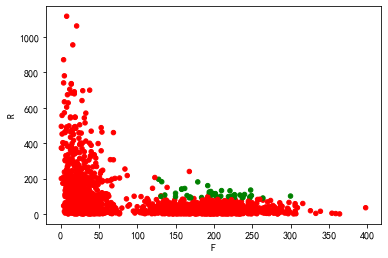

In [57]:
# 对重要价值客户和非重要价值客户进行可视化展示
rfm.loc[rfm.label=='重要价值客户','color']='g'
rfm.loc[~(rfm.label=='重要价值客户'),'color']='r'
rfm.plot.scatter('F','R',c= rfm.color)

通过RFM识别不同的客户群体，能够衡量客户价值和客户利润创收能力，可以指定个性化的沟通和营销服务，为更多的营销决策提供有力支持，为企业创造更大的利益。

##### 4.3.4 新用户、活跃用户、不活跃用户和回归用户分析

In [58]:
# 设置Customer_ID为索引，month为列名，统计每个月的购买次数
pivoted_counts = df.pivot_table(index= 'Customer_ID',
                               columns= 'month',
                               values= 'Order_Date',
                               aggfunc= 'count').fillna(0)
# 大于一次的全部设为1
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

month,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01
Customer_ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,0,0,1,1,0,0,0,0,1,0,...,0,1,0,1,1,1,0,0,0,1
AA-10375,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,1,1
AA-10480,1,0,1,1,0,1,0,1,0,0,...,1,1,1,0,0,1,1,0,0,0
AA-10645,1,0,0,1,0,1,1,0,0,0,...,1,1,0,1,0,0,0,1,1,1
AA-315,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [59]:
# 定义状态函数并进行状态标记
def active_status(data):
    status = []
    for i in range(48):
        if data[i] == 0:
            if len(status)>0:
                if status[i-1] == "unreg":
                 # 未注册客户
                    status.append("unreg")
                else:
                 # 不活跃用户
                    status.append("unactive")
            else:
                status.append("unreg")
            
        # 若本月消费了
        else:
            if len(status) == 0:
             # 新用户
                status.append("new")
            else:
                if status[i-1] == "unactive":
                 # 回归用户
                    status.append("return")
                elif status[i-1] == "unreg":
                    status.append("new")
                else:
                    status.append("active")
    return pd.Series(status)  

purchase_stats = df_purchase.apply(active_status,axis =1)
purchase_stats.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Customer_ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,unreg,unreg,new,active,unactive,unactive,unactive,unactive,return,unactive,...,unactive,return,unactive,return,active,active,unactive,unactive,unactive,return
AA-10375,unreg,unreg,unreg,new,unactive,unactive,return,unactive,unactive,return,...,unactive,unactive,unactive,unactive,unactive,return,unactive,return,active,active
AA-10480,new,unactive,return,active,unactive,return,unactive,return,unactive,unactive,...,return,active,active,unactive,unactive,return,active,unactive,unactive,unactive
AA-10645,new,unactive,unactive,return,unactive,return,active,unactive,unactive,unactive,...,return,active,unactive,return,unactive,unactive,unactive,return,active,active
AA-315,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,...,unactive,unactive,return,unactive,return,unactive,unactive,unactive,unactive,return


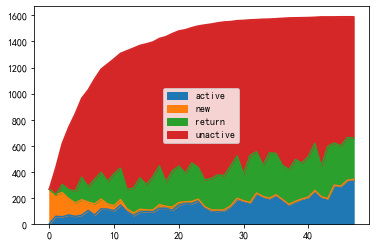

In [60]:
# 用NaN替代‘unreg’，并统计每月各状态客户数量
purchase_stats_ct = purchase_stats.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
# 用0填充NaN
purchase_stats_ct.fillna(0).T.plot.area()

从以上结果可以发现活跃客户、新客户和回归客户，每年呈一定的规律起伏，这可能和年终年末大促有关，需要更多数据进行佐证；同时可以发现新客数量每年均在减少，说明该商家新客获取率较低，如果能在新客户获取上取得突破，会给商家带来很大的增长空间。

##### 4.3.5 复购率和回购率分析
复购率计算指标：用户在该月购买过一次以上算复购

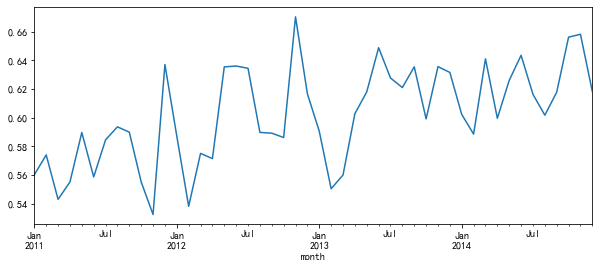

In [61]:
purchase_r = pivoted_counts.applymap(lambda x :1 if x>1 else np.NaN if x==0 else 0)
(purchase_r.sum()/purchase_r.count()).plot(figsize=(10,4))

回购率计算指标：在该月购买过，且在下月也购买时计入回购

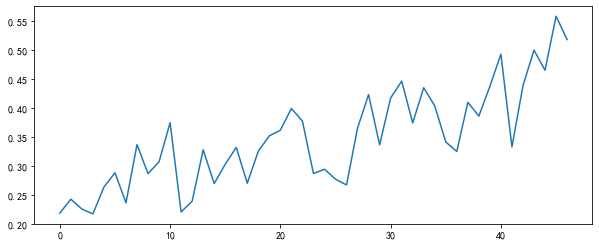

In [62]:
def purchase_back(data):
    status=[]
    for i in range(47):
        if data[i] ==1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

purchase_b = df_purchase.apply(purchase_back,axis =1,result_type='expand')
(purchase_b.sum()/purchase_b.count()).plot(figsize=(10,4))

从上可以发现复购率基本大于0.525，且呈总体上升趋势，说明客户忠诚度高，回购率在年中年末呈峰形态，可能与商家折扣活动或节日有关。

### 5、总结

本文分别通过 场、货、人 三个不同的角度去分析一家全球超市的销售、商品、用户情况，并根据分析结果给出一些有利于拓展用户、提升销量的办法。

当然，这份数据集包含信息很多，还可以进行其它一些方面的分析，来给出更好的建议。